In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
df=pd.read_csv("Heart.csv")
df.drop(columns="Unnamed: 0",inplace=True)
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [51]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]).columns:
    df[i]=label.fit_transform(df[i])

df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [52]:
df.drop(index=0,axis=1)
x=df.drop("AHD",axis=1)
y=df["AHD"]
y



0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
132,29,1,2,130,204,0,2,202,0,0.0,1,0.0,1
202,57,1,1,150,126,1,0,173,0,0.2,1,1.0,2
196,69,1,3,160,234,1,2,131,0,0.1,2,1.0,1
75,65,0,1,160,360,0,2,151,0,0.8,1,0.0,1
176,52,1,0,108,233,1,0,147,0,0.1,1,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,2,192,283,0,2,195,0,0.0,1,1.0,2
71,67,1,0,125,254,1,0,163,0,0.2,2,2.0,2
106,59,1,0,140,177,0,0,162,1,0.0,1,1.0,2
270,61,1,0,140,207,0,2,138,1,1.9,1,1.0,2


In [54]:
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",50
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [55]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [56]:
accuracy=accuracy_score(y_pred,y_test)
print(f"accuracy_score:{accuracy*100:.2f}%")

accuracy_score:85.25%


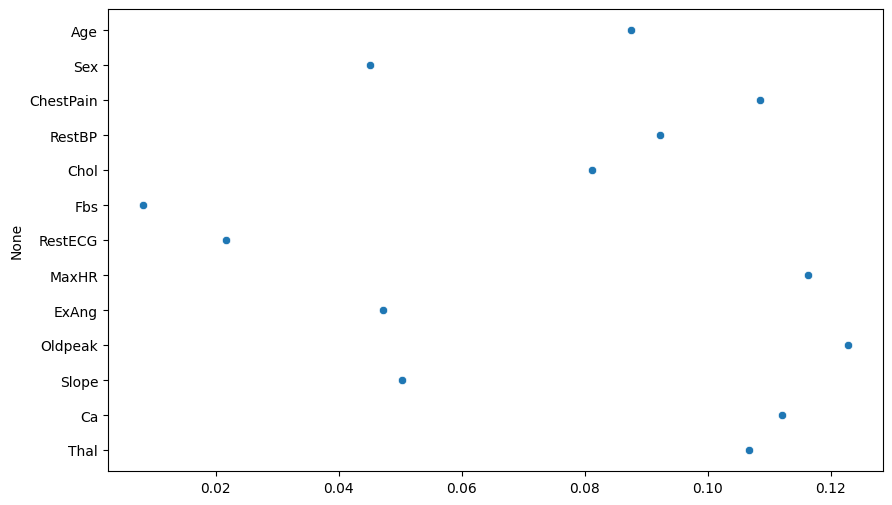

In [57]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=model.feature_importances_,y=x.columns)
plt.show()

In [58]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2,1
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,1,1


In [59]:
next=pd.DataFrame({
    
    "Age":["63"],
    "Sex":["1"],  
    "ChestPain":["typical"],
    "RestBP":["133"],
    "Chol":["233"],
    "Fbs":["1"],
    "RestECG":["2"],
    "MaxHR":["150"],
    "ExAng":["0"],
    "Oldpeak":["0.0"],
    "Slope":["1"],
    "Ca":["0.0"],
    "Thal":["fixed"]

})
for i in next.select_dtypes(include=['object']).columns:
    next[i]=label.fit_transform(next[i])

predict=model.predict(next)
predict

array([0])